### Librerias

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
from wordcloud import WordCloud



### Cargar los datos

In [33]:
df = pd.read_excel('Encuesta_Inteligencia_Artificial.xlsx', sheet_name='Mi nuevo formulario')
print("las siguientes columnas se encontraron vacias\n")
print('\n'.join(df.columns[df.isna().all()]))
df.insert(0, 'Docente', df['Nombre'] + ' ' + df['Apellido(s)'])
df = df.drop(columns=['Nombre', 'Apellido(s)', 'Correo electrónico', 'Submitted At', 'Token'])

las siguientes columnas se encontraron vacias

Otras (Especifique):
Otras (Especifique):.1
Otras (Observaciones):
¿Cómo ha impactado la IA en el aprendizaje de los estudiantes?
(Marque una opción y agregue observaciones si lo considera necesario)
Otras (Observaciones):.1
¿Ha utilizado IA en el proyecto de aula?
Otras (Observaciones):.2


### Exploración y limpieza de columnas

In [34]:

df = df.dropna(axis=1, how='all')
df.columns.values[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]] = ['Programa académico', 'UsaIA', 'AsignaturasIA_CantEstudiante', 'TiposIA', 'AspectosUsabilidad', 'ImpactoIA', 'IA_PA', 'BeneficiosIA', 'RetosIA', 'FormaciónAdicional', 'EntrenamientoIAespecifica', 'Justificacion', 'FormaciónIAGenerativaxEduc', 'IAprendizajeEst']
print('\n'.join(df.columns))
#print('\n'.join(df['Programa académico'].dropna().astype(str)))
#df[['Programa académico']].to_csv('Programa académico.csv', index=False)

Docente
Programa académico
UsaIA
AsignaturasIA_CantEstudiante
TiposIA
AspectosUsabilidad
ImpactoIA
IA_PA
BeneficiosIA
RetosIA
FormaciónAdicional
EntrenamientoIAespecifica
Justificacion
FormaciónIAGenerativaxEduc
IAprendizajeEst


### Porcentaje de docentes que usan IA

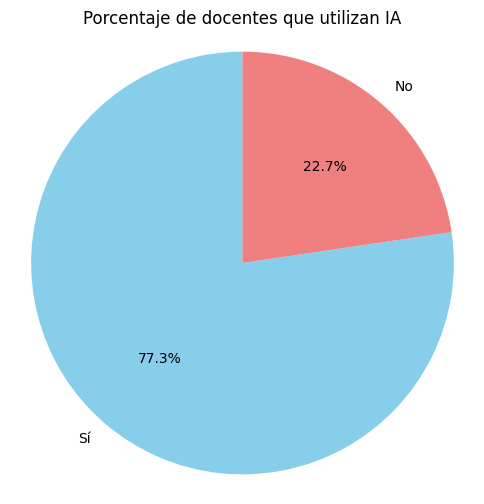

In [35]:
valores = df['UsaIA'].value_counts()
valores.index = valores.index.map({True: 'Sí', False: 'No'})

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Porcentaje de docentes que utilizan IA')
plt.axis('equal')
plt.show()

##### Sugerencia: consultar la edad y el genero de los docentes para clasificar y proponer estrategias con un mayor ajuste

## Normalizar y unificar programa académico

In [36]:
df['Programa académico'] = df['Programa académico'].str.lower().str.strip().str.replace(',', '').str.replace('.', '')
df['Programa académico'] = df['Programa académico'].apply(lambda x: unicodedata.normalize('NFKD', str(x)).encode('ASCII', 'ignore').decode('utf-8'))
df['Programa académico'] = df['Programa académico'].str.replace(r'\bing\b', 'ingenieria', case=False, regex=True)
df['Programa académico'] = df['Programa académico'].replace({
    'tecnologia ambiental ingenieria civil': 'ingenieria civil',
    'gestion turistica y hotelera': 'tecnologia en gestion turistica y hotelera',
    'tghyt': 'tecnologia en gestion turistica y hotelera',
    'administracion de empresas ni lp ht':'administracion de empresas',
    'psicologiatrabajo social lic  educacion infantil y promocion social':'psicologia',
    'tecnologia en seguridad e higiene ocupacionalne' : 'tecnologia en seguridad e higiene ocupacional',
    'gestion contable':'tecnologia en gestion contable',
    'gestion contable y gestion financiera': 'tecnologia en gestion financiera',
    'produccion industrial': 'tecnologia en produccion industrial',
    'gestion de negocios internacionales':'negocios internacionales'
})



## Porcentaje Usabilidad IA por programa

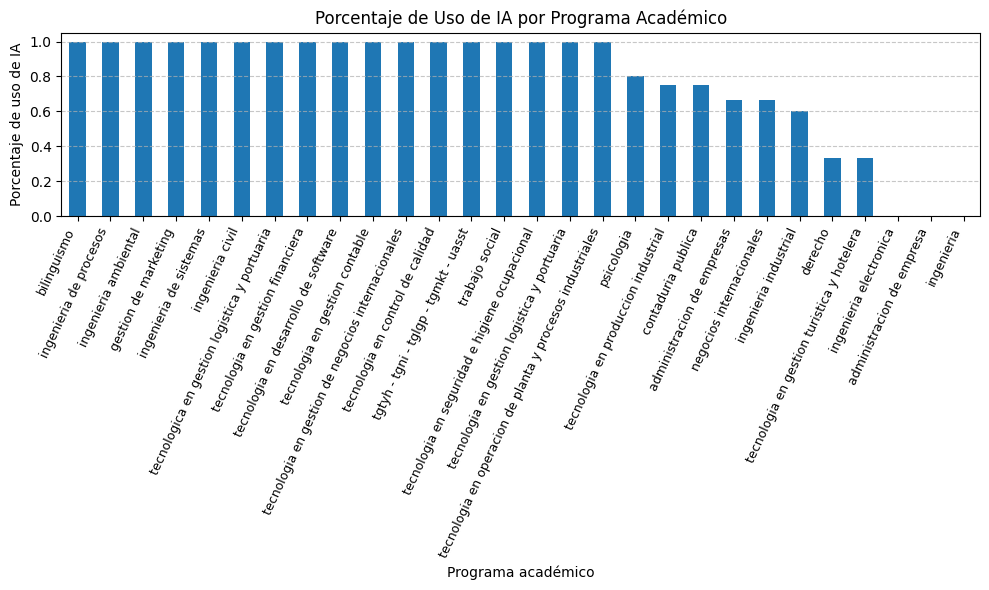

In [37]:
df.groupby('Programa académico')['UsaIA'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title='Porcentaje de Uso de IA por Programa Académico')
plt.ylabel('Porcentaje de uso de IA')
plt.title('Porcentaje de Uso de IA por Programa Académico')
plt.xticks(rotation=65, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Reporte Usabilidad Tipos de IA por Docente

3.24


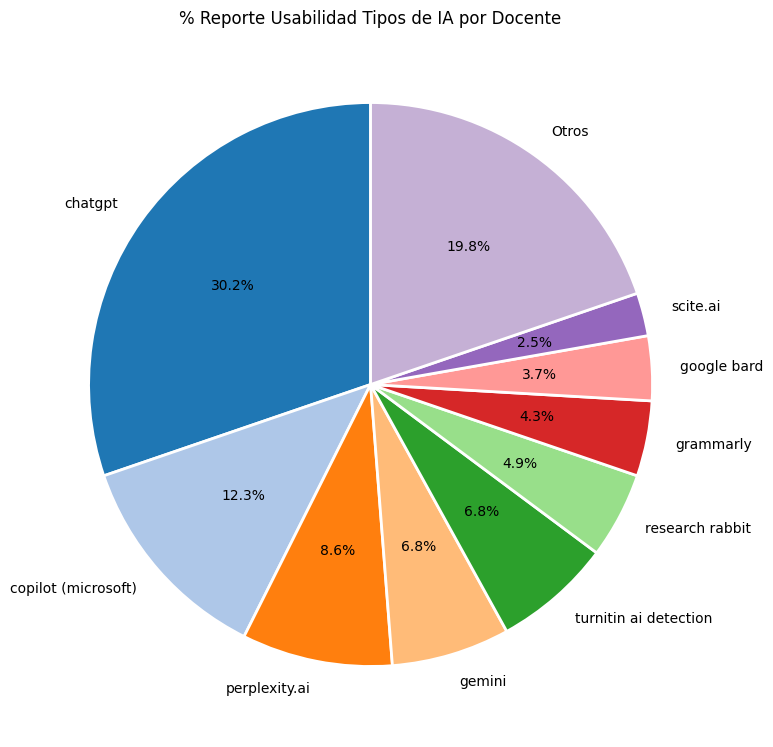

In [38]:
# Primero, combinamos todas las respuestas en una sola lista
TiposInteligencia = df['TiposIA'].str.split(',').explode()
TiposInteligencia= TiposInteligencia.str.lower().str.strip().str.replace(',', '')
TiposInteligencia= TiposInteligencia.replace({
    'gemini y meta.':'gemini',
    'geminis':'gemini',
    'consesus':'consensus'
})
# Contabilizamos las respuestas

conteo_TiposIA= TiposInteligencia.value_counts()
umbral = 0.02 * conteo_TiposIA.sum()
conteo_agrupado = conteo_TiposIA[conteo_TiposIA >= umbral]
otros = conteo_TiposIA[conteo_TiposIA < umbral].sum()
conteo_agrupado["Otros"] = otros
print(umbral)

# Crear el gráfico
plt.figure(figsize=(8, 8))
conteo_agrupado.plot.pie(
    autopct='%1.1f%%',
    colors=plt.cm.tab20.colors, #paleta de colores
    startangle=90,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'}
)
plt.title("% Reporte Usabilidad Tipos de IA por Docente")
plt.ylabel('')  # quitar etiqueta "count"
plt.tight_layout()
plt.show()




##### ChatGPT es la herramienta más reportada con un 30,2%, le siguen Copilot (Microsoft) con 12,3% y Perplexity.ai con 8,6%, Herramientas como Gemini, Turnitin AI Detection, Research Rabbit, Grammarly y Google Bard aparecen en el rango del 2% al 6,8%, lo que sugiere una adopción significativa, pero secundaria, La categoría "Otros" (19,8%) agrupa una gran variedad de herramientas menos frecuentes indica una diversidad de intereses y experimentación activa entre los docentes con múltiples tecnologías.

## Cantidad de docentes por tipo de IA

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\acmen\AppData\Local\Temp\ipykernel_15948\3498160297.py:8: SyntaxWarning: invalid escape sequence '\s'
  df_expandido = df_expandido.assign(TiposIA=df_expandido['TiposIA'].str.split(',\s*')).explode('TiposIA')


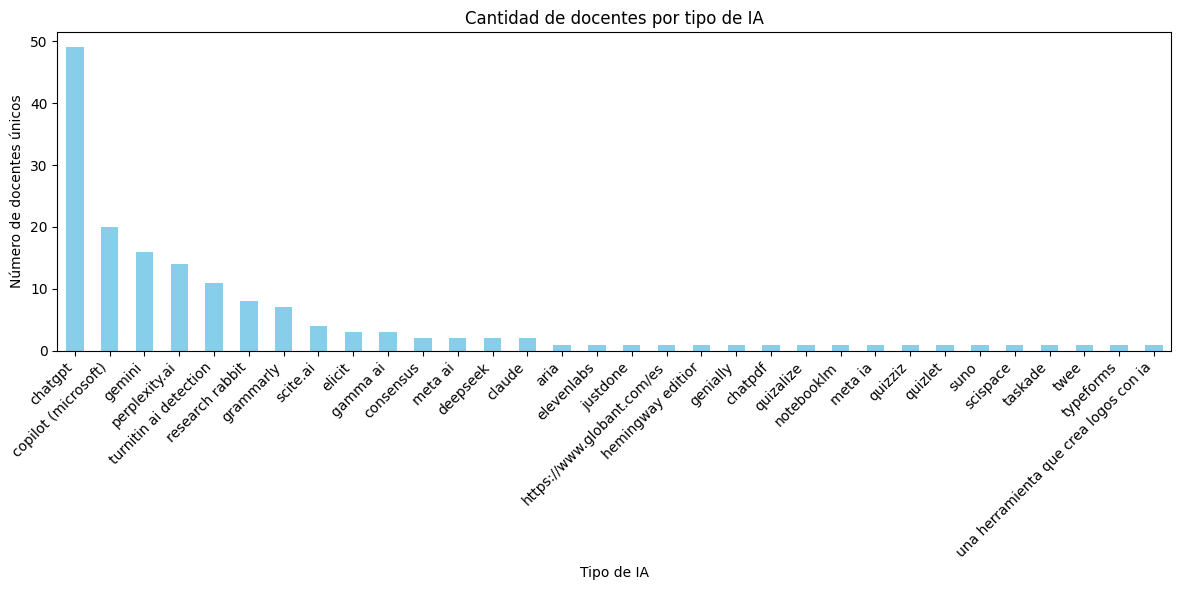

In [55]:
# Elimina nulos, normaliza caracteres, quita espacios y pasa todo a minúsculas
df_expandido = df.dropna(subset=['TiposIA']).copy()
df_expandido['TiposIA'] = df_expandido['TiposIA'].str.strip().str.lower()
df_expandido['TiposIA'] = df_expandido['TiposIA'].apply(
    lambda x: unicodedata.normalize('NFKD', str(x)).encode('ASCII', 'ignore').decode('utf-8'))

# Divide múltiples IAs
df_expandido = df_expandido.assign(TiposIA=df_expandido['TiposIA'].str.split(',\s*')).explode('TiposIA')

# Vuelve a limpiar por si había variaciones en elementos después de explotar
df_expandido['TiposIA'] = df_expandido['TiposIA'].str.strip()

# Diccionario de reemplazo con más variaciones
reemplazos = {
    'gemini y meta.': 'gemini',
    'geminis': 'gemini',
    'gemini.': 'gemini',
    'gemini y meta': 'gemini',
    'consesus': 'consensus',
    'consensus.': 'consensus',
    'bard': 'gemini',
    'deepzeek':'deepseek',  
    'gamma': 'gamma ai',
    'meta':'meta ai',
    'google bard':'gemini'# opcional si consideras que bard es lo mismo que gemini
    # puedes seguir agregando aquí más equivalencias
}

df_expandido['TiposIA'] = df_expandido['TiposIA'].replace(reemplazos)

# Conteo y gráfico
conteo_por_ia = df_expandido.groupby('TiposIA')['Docente'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
conteo_por_ia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de docentes por tipo de IA')
plt.xlabel('Tipo de IA')
plt.ylabel('Número de docentes únicos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Aspectos usabilidad IA

AspectosUsabilidad
generación de contenido didáctico                               37
búsqueda y análisis de información científica                   30
simulación de casos y escenarios                                27
apoyo en la redacción de textos académicos                      24
desarrollo de actividades interactivas                          24
asistencia en la resolución de problemas o ejercicios           22
evaluación y retroalimentación automatizada                     13
programación o desarrollo de proyectos técnicos                  6
hacer rastreos conceptuales y cuadros de comparación             3
verificar si el contenido de un documento se hizo con una ia     2
verificación de respuestas con bases de datos de libros          1
herramientas de marketing                                        1
Name: count, dtype: int64


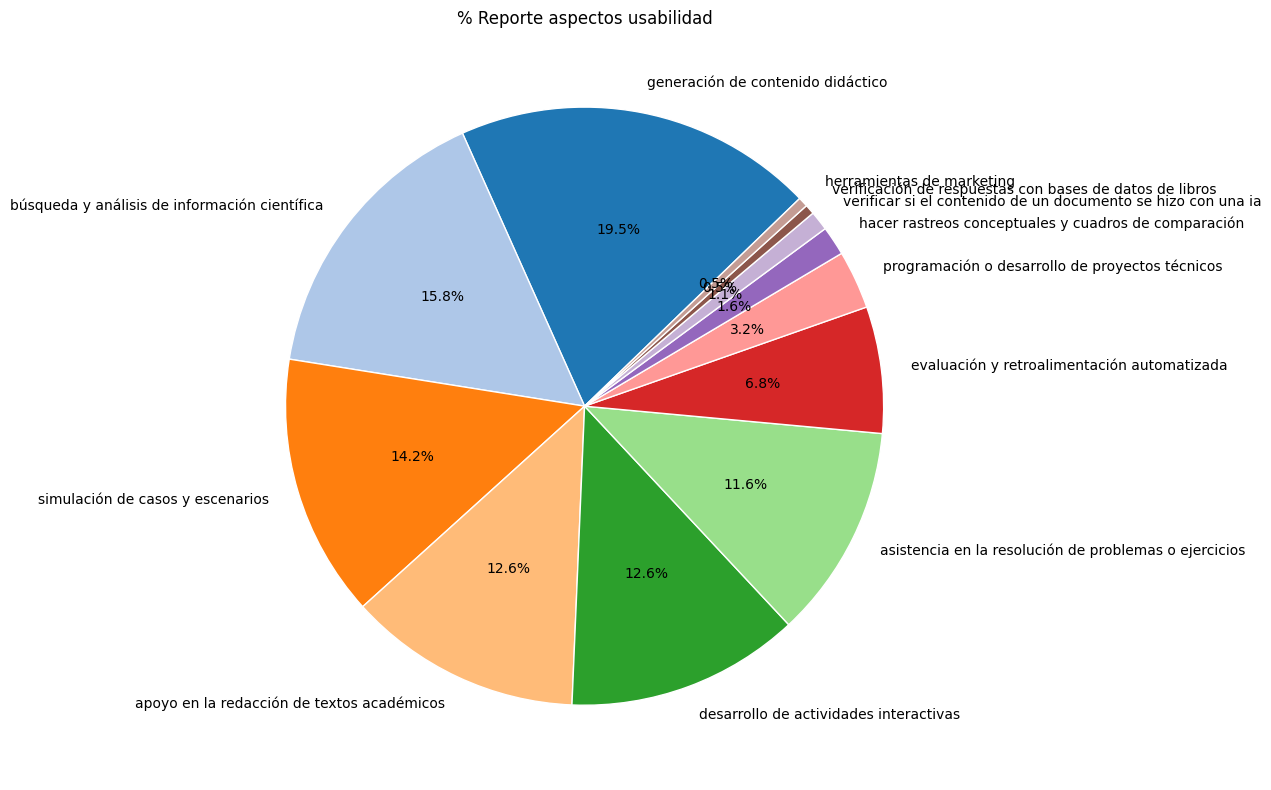

In [40]:
# Primero, combinamos todas las respuestas en una sola lista
AspectosUsabilidad = df['AspectosUsabilidad'].str.split(',').explode()
AspectosUsabilidad = AspectosUsabilidad.str.lower().str.strip().str.replace(',', '')
AspectosUsabilidad= AspectosUsabilidad.replace({
    'uso de ia para resolver problemas. redacción de preguntas':'asistencia en la resolución de problemas o ejercicios',
    'búsqueda de conceptos':'hacer rastreos conceptuales y cuadros de comparación',
    'ampliación de conceptos.':'hacer rastreos conceptuales y cuadros de comparación',
    'verificar el plagio o la autenticación en los trabajos escritos':'verificar si el contenido de un documento se hizo con una ia',
    'elaboración de ítem':'generación de contenido didáctico',
    'evaluación de contenido':'evaluación y retroalimentación automatizada',
    'ej: solicitud de mejoras en una formula de búsqueda de análisis bibliométrico':'búsqueda y análisis de información científica',
    'preguntas puntuales':'asistencia en la resolución de problemas o ejercicios',
    'código en python y matlab':'programación o desarrollo de proyectos técnicos',
    'establecer ventajas competitivas  a través de soluciones comerciales específicas impulsadas por ia':'asistencia en la resolución de problemas o ejercicios'
})

conteo_AspectosUsabilidad = AspectosUsabilidad.value_counts()
print(conteo_AspectosUsabilidad)


# Crear el gráfico
plt.figure(figsize=(12, 8))
conteo_AspectosUsabilidad.plot.pie(
    autopct='%1.1f%%',
    colors=plt.cm.tab20.colors, #paleta de colores
    startangle=44,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title("% Reporte aspectos usabilidad")
plt.ylabel('')  # quitar etiqueta "count"
plt.tight_layout()
plt.show()



### Impacto y beneficios de la IA

#### En cuanto al impacto y los beneficios del uso de la IA 23% de los docentes no respondieron y del 77% restante: el 65% afirma que ha optimizado el tiempo en el proceso de preparación de contenido didactico y evaluación de aprendizajes, un 3% indica que no ha representado cambios significativos y el 9% restante indica opciones como: los estudiantes se encuentran mas motivados y usan sus celulares para algo diferente a las redes socials, automaización y analisis de datos o simplemente ha mejorado la dinamica de la clase. La docente Blanca Espinel hace un aporte significativo en los beneficios

### Retos implementación y uso IA

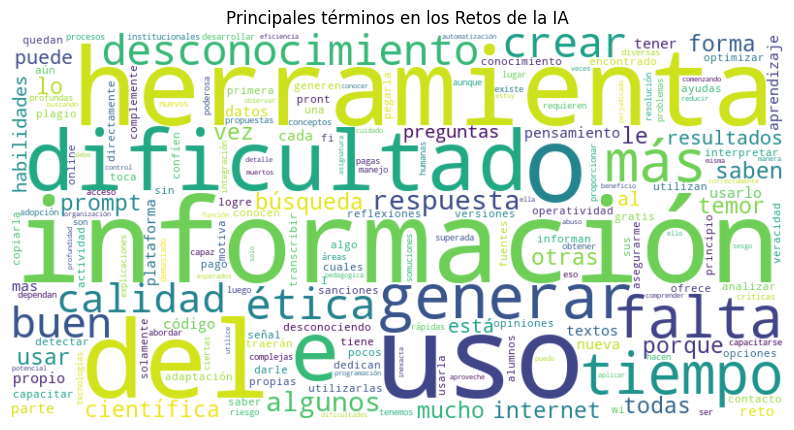

In [41]:
RetosIA = df['RetosIA'].explode().dropna()

# Eliminar los valores ruidosos
patron_ruido = r'^[a-z]{3,}$'
RetosIA = RetosIA.str.lower().str.strip().str.replace(',', '')
RetosIA = RetosIA[~RetosIA.str.fullmatch(patron_ruido, na=False)]

#Eliminar filas que no son retos
indices_a_eliminar = [1, 2, 18, 68, 70, 42, 12]  # reemplaza con los índices reales

# Eliminar esas filas de la Serie
RetosIA = RetosIA.drop(index=indices_a_eliminar)

#Eliminar palabras que no son retos
RetosIA = RetosIA.str.replace(r'\by\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bde\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bel\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bla\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bia\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\blas\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\ben\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\blos\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bque\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bpor\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bpara\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bcomo\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bestudiante\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bestudiantes\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bsu\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bse\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\besta\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bpero\b', '', regex=True).str.strip()
RetosIA = RetosIA.str.replace(r'\bcon\b', '', regex=True).str.strip()


texto = ' '.join(RetosIA.dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Principales términos en los Retos de la IA")
plt.show()


##### En cuanto a los retos, los mas reportados son:

## IA en el proyecto de aula

IA_PA
no se ha utilizado en el proyecto de aula                         20
ha sido útil en la redacción y presentación de resultados         13
ha permitido mejorar la recolección y análisis de datos           13
ha facilitado la formulación y desarrollo del proyecto de aula    10
hasta el momento no lo he utilizado                                1
Name: count, dtype: int64


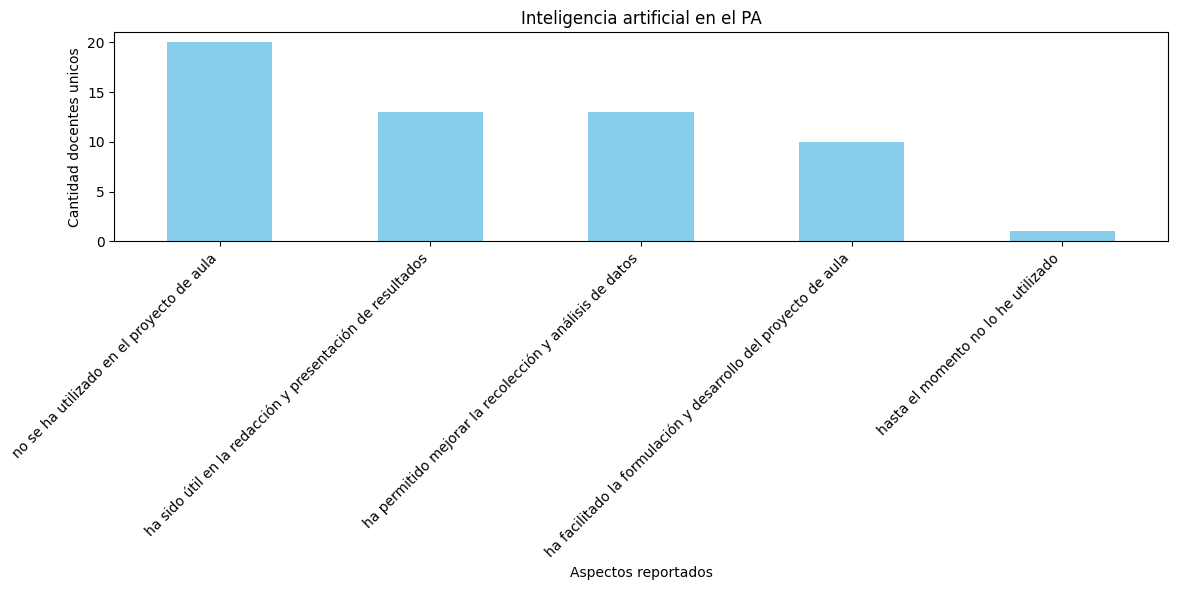

In [42]:
IA_PA = df['IA_PA'].str.split(',').explode()
IA_PA = IA_PA.str.lower().str.strip().str.replace(',', '').dropna()
indices_a_eliminar = [38]  # reemplaza con los índices reales
# Eliminar esas filas de la Serie
IA_PA = IA_PA.drop(index=indices_a_eliminar)
Conteo_IA_PA = IA_PA.value_counts()
print(Conteo_IA_PA)

plt.figure(figsize=(12, 6))
Conteo_IA_PA.plot(kind='bar', color='skyblue')
plt.title('Inteligencia artificial en el PA')
plt.xlabel('Aspectos reportados')
plt.ylabel('Cantidad docentes unicos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

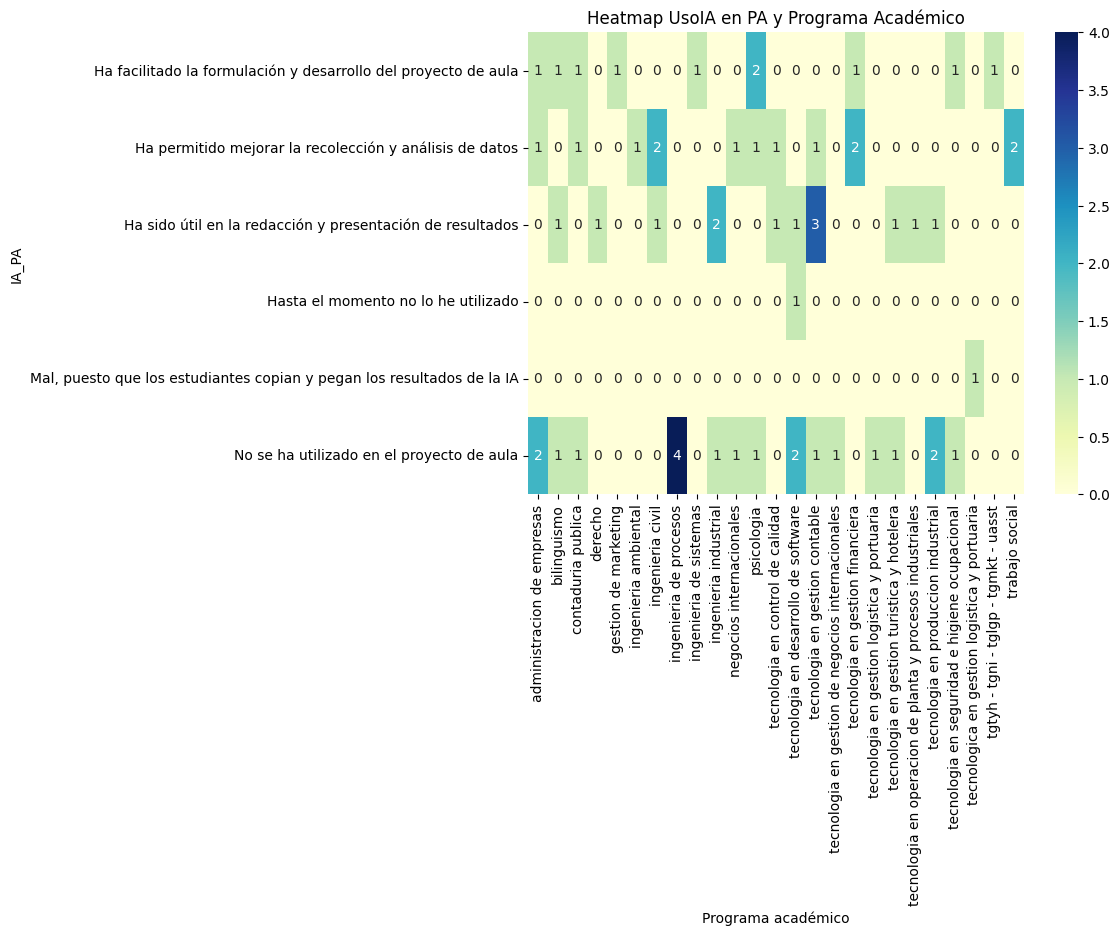

In [43]:
#grupo = df.groupby(['IA_PA', 'Programa académico']).sum()
tabla_cruzada = pd.crosstab(df['IA_PA'], df['Programa académico'])
#print(tabla_cruzada)
# Crear el heatmap de la tabla cruzada
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_cruzada, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# Mostrar el gráfico
plt.title("Heatmap UsoIA en PA y Programa Académico")
plt.show()

### Docentes que no usan IA

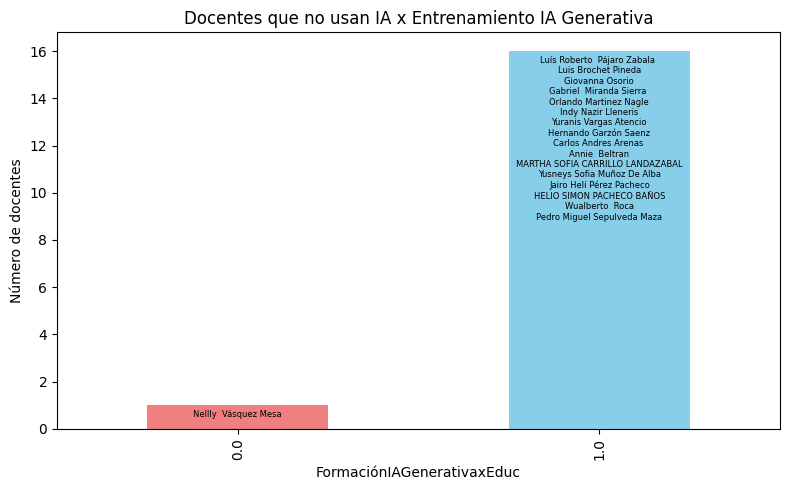

In [44]:
# Filtrar docentes que no usan IA
df_filtrado = df[df['UsaIA'] == False]

# Agrupar por "Requieren entrenamiento"
grupo = df_filtrado.groupby('FormaciónIAGenerativaxEduc')['Docente'].agg(['count', list])

# Graficar
ax = grupo['count'].plot(kind='bar', 
                         color=['lightcoral', 'skyblue'],
                         figsize=(8, 5),
                         ylabel='Número de docentes',
                         title='Docentes que no usan IA x Entrenamiento IA Generativa')

# Añadir etiquetas con nombres sobre cada barra
for i, (Docente, total) in enumerate(zip(grupo['list'], grupo['count'])):
    etiqueta = '\n'.join(Docente)
    ax.text(i, total-0.2, etiqueta, ha='center', va='top', fontsize=6, rotation=0)

plt.tight_layout()
plt.show()


### Formación adicional docentes que usan IA

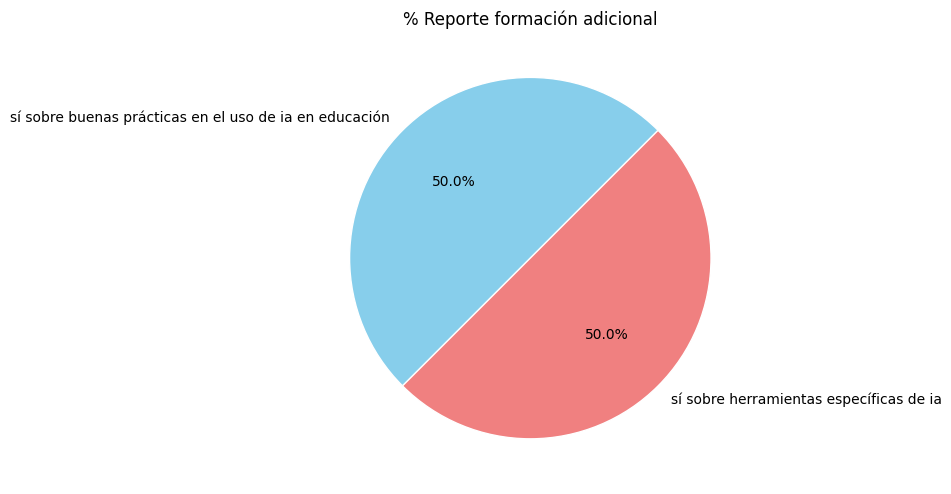

In [45]:
FormaciónD = df['FormaciónAdicional'].explode()
FormaciónD = FormaciónD.str.lower().str.strip().str.replace(',', '')
FormaciónD = FormaciónD.replace({})


conteo_FormaciónD = FormaciónD.value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
conteo_FormaciónD.plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    startangle=45,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title("% Reporte formación adicional")
plt.ylabel('')  # quitar etiqueta "count"
plt.tight_layout()
plt.show()

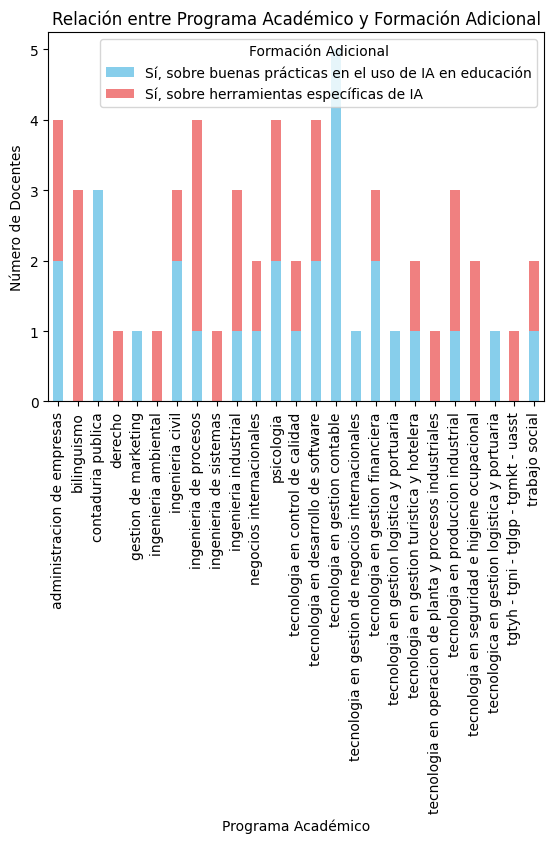

In [46]:

# Crear una tabla de frecuencia
tabla_frecuencia = pd.crosstab(df['Programa académico'], df['FormaciónAdicional'])

# Generar la gráfica de barras
tabla_frecuencia.plot(kind='bar',
                      stacked=True,
                      color=['skyblue', 'lightcoral'],)
plt.title('Relación entre Programa Académico y Formación Adicional')
plt.xlabel('Programa Académico')
plt.ylabel('Número de Docentes')
plt.legend(title='Formación Adicional')
plt.show()


### Asignaturas y estudiantes

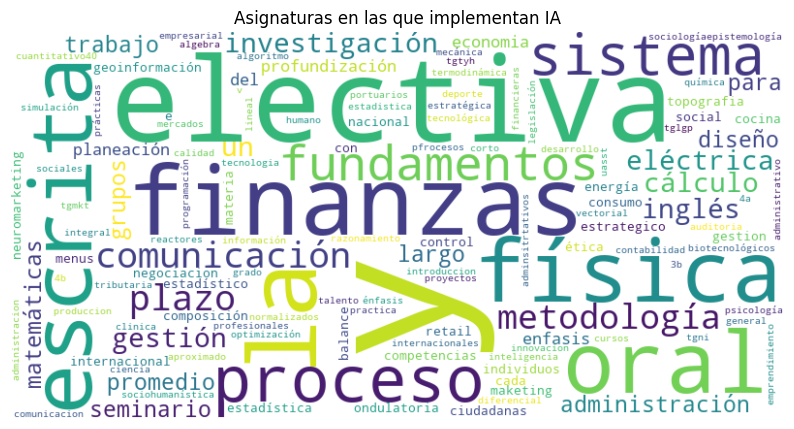

In [47]:
AsignaturasIA_CantEstudiante = df['AsignaturasIA_CantEstudiante']
patron_ruido = r'^[a-z]{3,}$'
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.lower().str.strip().str.replace(',', '').dropna()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante[~AsignaturasIA_CantEstudiante.str.fullmatch(patron_ruido, na=False)]
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\bestudiantes\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\bclase\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\bde\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\bii\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\baproximadamente\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\biii\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\buno\b', '', regex=True).str.strip()
AsignaturasIA_CantEstudiante = AsignaturasIA_CantEstudiante.str.replace(r'\btotal\b', '', regex=True).str.strip()


texto = ' '.join(AsignaturasIA_CantEstudiante.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Asignaturas en las que implementan IA")
plt.show()